In [111]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
def missing_values_table(df):
    '''A function to find and print missing values - zeroes, nulls and empty strings'''
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    zero_val_percent = 100 * zero_val / len(df)
    null_count = df.isnull().sum()
    null_count_percent = 100 * null_count / len(df)
    empty_str = (df == ' ').sum()
    empty_str_percent = 100 * empty_str / len(df)
    
    mv_table = pd.concat([zero_val, zero_val_percent, null_count, null_count_percent, empty_str, empty_str_percent], axis=1)
    mv_table = mv_table.rename(columns = {0 : 'Zero Values', 1 : 'Zeros as % of Tot. Val.', 2 : 'Null Count', 3 : 'Nulls as % of Tot. Val.', 4 : 'Empty Strings', 5 : 'Empties as % of Tot. Val.'})
    mv_table['Total Missing Values'] = mv_table['Zero Values'] + mv_table['Null Count'] + mv_table['Empty Strings']
    mv_table['Total as % of Tot. Val.'] = 100 * mv_table['Total Missing Values'] / len(df)
    mv_table['Data Type'] = df.dtypes
    mv_table = mv_table[mv_table.iloc[:,7] != 0].sort_values('Total as % of Tot. Val.', ascending=False).round(1)
    
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
        "There are " + str(mv_table.shape[0]) + " columns that have missing values.")

    return mv_table

In [47]:
df = pd.read_csv('Data.csv')

In [48]:
df

,TCITY15CD,Town/City,Region/Country,Attraction 1,Description 1,Rating 1,Reviewers 1,Attraction 2,Description 2,Rating 2,...,Reviewers 7,Attraction 8,Description 8,Rating 8,Reviewers 8,Attraction 9,Description 9,Rating 9,Reviewers 9,Tags
0,J01000001,Barnsley,Yorkshire and The Humber,Calypso Cove Waterpark,Flume rides & themed kiddie pools,4.3,1615.0,The Cooper Gallery,Local philanthropist's art collection,4.5,...,275.0,Cannon Hall Museum Park and Gardens,Art & history in a Georgian stately home,4.6,557.0,Barnsley Town Hall,Architecture,4.3,19.0,"Kid friendly, Outdoors"
1,J01000002,Basildon,East of England,Wat Tyler Centre,Rural park with environmental mission,4.4,1268.0,Festival Leisure Park,"Cinema, bowling & b=global eating",4.3,...,44.0,Northlands Park,Large public green space & fishing lakes,4.3,869.0,Hadleigh Castle,Ruined 1200s towers overlooking marsh,NaN,NaN,"Kid friendly, Outdoors"
2,J01000003,Basingstoke,South East,Milestones Museum,Interactive with street scenes & shops,4.5,1730.0,Festival Place,Shopping,NaN,...,1447.0,The War Memorial Park,Sereneoasis with bandstand & aviary,4.4,970.0,Basingstoke Aquadrome,Water park,3.1,199.0,"Kid friendly, Outdoors, History, Art and culture"
3,J01000004,Bath,South West,The Roman Baths,"Roman baths, museum and restaurant",4.6,22232.0,Bath Abbey,Medieval building with a gother interior,4.6,...,1891.0,Fashion Museum,Collection of modern & historic clothing,4.4,815.0,Prior Park Landscape Garden,18th-century park with Palladin bridges,4.4,1008.0,"Local favourites, Kid friendly, Outdoors, Muse..."
4,J01000005,Bedford,East of England,ZSL Whipsnade Zoo,Family fun at large conservation zoo,4.6,9419.0,Woburn Safari Park,Wild animals & rope walks in parkland,4.4,...,1247.0,Dunstable Downs,Scenic grasslands with wildlife & trails,4.6,291.0,The Higgins Bedford,Gallery & museum in landmark buildings,4.6,297.0,"Kid friendly, Outdoors, Museums, Art and cultu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,J01000111,Worthing,South East,Cissbury Ring,Views from county's largest hill fort,4.7,818.0,Worthing Pier,Old pier with fishing zones & a cafe,4.3,...,130.0,Colonnade House,Art,4.7,28.0,Beach House Park,Ornamental gardens with a bowling green,4.5,469.0,"Kid friendly, Outdoors, Art and culture"
108,J01000112,York,Yorkshire and The Humber,York Minster,Iconic Gothic-style Medieval cathedral,4.6,12513.0,National Railway Museum York,"Vintage trains, exhibitions & activities",4.7,...,989.0,York City Walls,Ruins of ancient stone structures,4.7,314.0,York's Chocolate Story,Guided tour through chocolate history,4.5,3265.0,"Kid friendly, Outdoors, Art and culture, Histo..."
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TCITY15CD       109 non-null    object 
 1   Town/City       109 non-null    object 
 2   Region/Country  109 non-null    object 
 3   Attraction 1    109 non-null    object 
 4   Description 1   107 non-null    object 
 5   Rating 1        106 non-null    float64
 6   Reviewers 1     106 non-null    float64
 7   Attraction 2    109 non-null    object 
 8   Description 2   109 non-null    object 
 9   Rating 2        105 non-null    float64
 10  Reviewers 2     105 non-null    float64
 11  Attraction 3    109 non-null    object 
 12  Description 3   106 non-null    object 
 13  Rating 3        108 non-null    float64
 14  Reviewers 3     108 non-null    float64
 15  Attraction 4    109 non-null    object 
 16  Description 4   102 non-null    object 
 17  Rating 4        108 non-null    flo

In [50]:
missing_values_table(df)

Your selected dataframe has 40 columns and 112 Rows.
There are 40 columns that have missing values.


,Zero Values,Zeros as % of Tot. Val.,Null Count,Nulls as % of Tot. Val.,Empty Strings,Empties as % of Tot. Val.,Total Missing Values,Total as % of Tot. Val.,Data Type
Description 9,0,0.0,21,18.8,0,0.0,21,18.8,object
Description 8,0,0.0,16,14.3,0,0.0,16,14.3,object
Description 7,0,0.0,16,14.3,0,0.0,16,14.3,object
Reviewers 9,0,0.0,11,9.8,0,0.0,11,9.8,float64
Rating 9,0,0.0,11,9.8,0,0.0,11,9.8,float64
Description 6,0,0.0,11,9.8,0,0.0,11,9.8,object
Description 4,0,0.0,10,8.9,0,0.0,10,8.9,object
Tags,0,0.0,9,8.0,0,0.0,9,8.0,object
Reviewers 8,0,0.0,9,8.0,0,0.0,9,8.0,float64
Rating 8,0,0.0,9,8.0,0,0.0,9,8.0,float64


In [51]:
#fix column names
#description -> desc
#reviewers -> revs
#tcity15cd -> towncity_id
#attraction -> attr

df.columns = df.columns.str.lower().str.replace('tcity15cd', 'towncity_id').str.replace('attraction', 'attr').str.replace('description', 'desc').str.replace('reviewers', 'revs').str.replace(' ', '_')

In [52]:
#null rows? weird. drop those
df.drop(axis = 0, index = [109, 110, 111], inplace = True)

In [53]:
#fill missing values in reviews
df[['revs_1', 'revs_2', 'revs_3', 'revs_4', 'revs_5', 'revs_6', 'revs_7', 'revs_8', 'revs_9']] = df[['revs_1', 'revs_2', 'revs_3', 'revs_4', 'revs_5', 'revs_6', 'revs_7', 'revs_8', 'revs_9']].fillna(0)

In [54]:
#change review data type to int
df[['revs_1', 'revs_2', 'revs_3', 'revs_4', 'revs_5', 'revs_6', 'revs_7', 'revs_8', 'revs_9']] = df[['revs_1', 'revs_2', 'revs_3', 'revs_4', 'revs_5', 'revs_6', 'revs_7', 'revs_8', 'revs_9']].astype('int64')

In [55]:
#fixing naming error
df.rename(columns = {'attr_6.1':'attr_7'}, inplace = True)

In [56]:
#set data type to string so the function will concat
df[['attr_1', 'desc_1', 'attr_2', 'desc_2', 'attr_3', 'desc_3', 'attr_4', 'desc_4', 'attr_5', 'desc_5', 'attr_6', 'desc_6', 'attr_7', 'desc_7', 'attr_8', 'desc_8', 'attr_9', 'desc_9']] = df[['attr_1', 'desc_1', 'attr_2', 'desc_2', 'attr_3', 'desc_3', 'attr_4', 'desc_4', 'attr_5', 'desc_5', 'attr_6', 'desc_6', 'attr_7', 'desc_7', 'attr_8', 'desc_8', 'attr_9', 'desc_9']].astype('str')

In [57]:
#removing trailing white space from town/city 
df['town/city'] = [x.rstrip() for x in df['town/city']]
    

In [58]:
df.tags = df.tags.astype('str')

In [59]:
#create simple ids
df['simple_id'] = range(1,110)

In [60]:
df['total_revs'] = df.revs_1 + df.revs_2 + df.revs_3 + df.revs_4 + df.revs_5 + df.revs_6 + df.revs_7 + df.revs_7 + df.revs_9

In [61]:
df.columns

Index(['towncity_id', 'town/city', 'region/country', 'attr_1', 'desc_1',
       'rating_1', 'revs_1', 'attr_2', 'desc_2', 'rating_2', 'revs_2',
       'attr_3', 'desc_3', 'rating_3', 'revs_3', 'attr_4', 'desc_4',
       'rating_4', 'revs_4', 'attr_5', 'desc_5', 'rating_5', 'revs_5',
       'attr_6', 'desc_6', 'rating_6', 'revs_6', 'attr_7', 'desc_7',
       'rating_7', 'revs_7', 'attr_8', 'desc_8', 'rating_8', 'revs_8',
       'attr_9', 'desc_9', 'rating_9', 'revs_9', 'tags', 'simple_id',
       'total_revs'],
      dtype='object')

keyword_cols = ['attr_1', 'desc_1', 'attr_2', 'desc_2', 'attr_3', 'desc_3', 'attr_4', 'desc_4', 'attr_5', 'desc_5', 'attr_6', 'desc_6', 'attr_7', 'desc_7', 'attr_8', 'desc_8', 'attr_9', 'desc_9']

In [62]:
# keywords function
def get_keywords(df):
    '''concats the strings from the keyword_cols to form a list of keywords'''
    keywords = []
    for i in range(0, df.shape[0]):
        keywords.append(df['attr_1'][i] + ' ' + df['attr_2'][i] + ' ' + df['attr_3'][i] + ' ' + df['attr_4'][i] + ' ' + df['attr_5'][i] + ' ' + df['attr_6'][i] + ' ' + df['attr_7'][i] + ' ' + df['attr_8'][i] + ' ' + df['attr_9'][i] + ' ' + df['desc_1'][i] + ' ' + df['desc_2'][i] + ' ' + df['desc_3'][i] + ' ' + df['desc_4'][i] + ' ' + df['desc_5'][i] + ' ' + df['desc_6'][i] + ' ' + df['desc_7'][i] + ' ' + df['desc_8'][i] + ' ' + df['desc_9'][i])

    return keywords

In [63]:
df['keywords'] = get_keywords(df)

df.keywords = df.keywords.astype('str')

In [64]:
#convert the text to a matrix of token counts
keyword_matrix = CountVectorizer(stop_words = 'english').fit_transform(df['keywords'])

In [65]:
#cosine similarity
cs = cosine_similarity(keyword_matrix)

In [66]:
df['town/city'].unique()

array(['Barnsley', 'Basildon', 'Basingstoke', 'Bath', 'Bedford',
       'Birkenhead', 'Birmingham', 'Blackburn', 'Blackpool', 'Bolton',
       'Bournemouth', 'Bracknell', 'Bradford', 'Brighton and Hove',
       'Bristol', 'Burnley', 'Burton upon Trent', 'Bury', 'Cambridge',
       'Carlisle', 'Chatham', 'Chelmsford', 'Cheltenham', 'Chester',
       'Chesterfield', 'Colchester', 'Coventry', 'Crawley', 'Darlington',
       'Derby', 'Doncaster', 'Dudley', 'Eastbourne', 'Exeter',
       'Gateshead', 'Gillingham', 'Gloucester', 'Grimsby', 'Guildford',
       'Halifax', 'Harlow', 'Harrogate', 'Hartlepool', 'Hastings',
       'Hemel Hempstead', 'High Wycombe', 'Huddersfield', 'Ipswich',
       'Kingston upon Hull', 'Leeds', 'Leicester', 'Lincoln', 'Liverpool',
       'London', 'Luton', 'Maidstone', 'Manchester', 'Mansfield',
       'Middlesbrough', 'Milton Keynes', 'Newcastle upon Tyne',
       'Newcastle-under-Lyme', 'Northampton', 'Norwich', 'Nottingham',
       'Nuneaton', 'Oldham', 'Oxfor

In [67]:
#last place visted
prev_visit = 'St Helens'

#place id
target_place = df[df['town/city'] == prev_visit]['simple_id'].values[0]

target_place

89

In [68]:
#list of scores for the target place
scores = list(enumerate(cs[target_place]))

#sort scores 
sorted_scores = sorted(scores, key = lambda x:x[1], reverse = True)

#drop first because it would be the same as the input therefore 1
sorted_scores = sorted_scores[1:]

sorted_scores

df.keywords.unique()

In [69]:
q = 0

print(f'Top 5 recommended towns/cities based on your last visited place - {prev_visit}:\n -----------------------------------------------------')

for score in sorted_scores:
    next_visit = df[df.simple_id == score[0]]['town/city'].values[0]
    q = q+1
    print(q, next_visit)
    if q == 5:
        break

Top 5 recommended towns/cities based on your last visited place - St Helens:
 -----------------------------------------------------
1 Reading
2 London
3 Hastings
4 Sunderland
5 Portsmouth


df.tags.unique()

df.tags.fillna('None', inplace = True)

In [88]:
def recommend_place(df, last_visted_place, keyword1):
    """Prints top 5 recommended towns/cities to visit in England based on the last place visted.
    Parameters
    -------------
    df: The dataframe - towns/cities, their attractions and descriptions
    last_visted_place: Last town/city visited
    keyword: Related to the type of attraction - eg. National Trust, Park, Museum, Spa
    Results
    -------------
    Top 5 recommended place to visit which have the specified keyword"""

    #accounting for whether a keyword is used
    if keyword1.lower() == 'none':
        rec_df = df
    else:
        rec_df = df[df['keywords'].str.contains(keyword1, case = False)]

    #.lower() to remove case sensitivity
    prev_visit = last_visted_place.lower()

    #update rec_df to include data for prev_visit if missing
    if prev_visit not in (x.lower() for x in rec_df['town/city']):
        missing_row = df[df['town/city'].str.lower() == prev_visit]
        updated_df = [rec_df, missing_row]
        rec_df = pd.concat(updated_df)

    #reset simple_id column for rec_df
    rec_df['simple_id'] = range(0, rec_df.shape[0])

    #get the id for the target place i.e. prev_visit
    target_place = rec_df[rec_df['town/city'].str.lower() == prev_visit]['simple_id'].values[0]

    #convert the text to a matrix of token counts
    keyword_matrix = CountVectorizer(stop_words = 'english').fit_transform(rec_df['keywords'])
    #calculate similarity
    cs = cosine_similarity(keyword_matrix)

    #list of scores for the target place
    scores = list(enumerate(cs[target_place]))
    #sort scores 
    sorted_scores = sorted(scores, key = lambda x:x[1], reverse = True)
    #drop first because it would be the same as the input therefore 1
    sorted_scores = sorted_scores[1:]

    #recommendation results
    q = 0
    print(f'Top 5 recommended towns/cities based on your last visited place - {prev_visit.capitalize()}:\n -----------------------------------------------------')
    for score in sorted_scores:
        next_visit = rec_df[rec_df.simple_id == score[0]]['town/city'].values[0]
        q = q+1
        print(q, next_visit)
        if q == 5:
            break

In [89]:
recommend_place(df, 'Manchester', 'National Trust')

Top 5 recommended towns/cities based on your last visited place - Manchester:
 -----------------------------------------------------
1 Bradford
2 Worcester
3 Birkenhead
4 Brighton and Hove
5 Bristol


In [98]:
text = df.keywords.str.lower().tolist()

In [100]:
text = ' '.join(text)

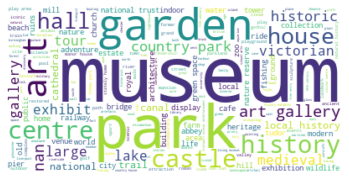

In [110]:
#plt.figure(figsize = [15, 10])
wordcloud = WordCloud(stopwords = STOPWORDS, collocations=True, background_color = 'white').generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

In [113]:
keyword_matrix = CountVectorizer(stop_words = 'english').fit_transform(df['keywords'])

In [114]:
km = KMeans(n_clusters=3, random_state=124)
km.fit(keyword_matrix)

KMeans(n_clusters=3, random_state=124)

In [115]:
df['cluster'] = km.labels_

In [117]:
df.cluster.unique()

array([0, 1, 2])

In [195]:
df[df['cluster'] == 0]['town/city']

0                  Barnsley
2               Basingstoke
4                   Bedford
17                     Bury
22               Cheltenham
26                 Coventry
30                Doncaster
35               Gillingham
37                  Grimsby
42               Hartlepool
43                 Hastings
46             Huddersfield
47                  Ipswich
55                Maidstone
58            Middlesbrough
61     Newcastle-under-Lyme
62              Northampton
65                 Nuneaton
70                    Poole
72                  Preston
73                  Reading
74                 Redditch
76                Rotherham
79                Sheffield
87                St Albans
91         Stockton-on-Tees
92           Stoke-on-Trent
93               Sunderland
95                  Swindon
97                Wakefield
98                  Walsall
99               Warrington
100                 Watford
106               Worcester
Name: town/city, dtype: object

In [138]:
df[df['cluster'] == 1]['town/city']

1               Basildon
7              Blackburn
8              Blackpool
10           Bournemouth
11             Bracknell
15               Burnley
16     Burton upon Trent
20               Chatham
21            Chelmsford
24          Chesterfield
25            Colchester
27               Crawley
28            Darlington
29                 Derby
31                Dudley
32            Eastbourne
33                Exeter
38             Guildford
39               Halifax
41             Harrogate
44       Hemel Hempstead
45          High Wycombe
54                 Luton
57             Mansfield
59         Milton Keynes
63               Norwich
64            Nottingham
66                Oldham
68          Peterborough
69              Plymouth
77               Salford
78            Scunthorpe
80            Shrewsbury
81                Slough
82              Solihull
85       Southend-on-Sea
86             Southport
88             St Helens
89             Stevenage
90             Stockport


In [121]:
df[df['cluster'] == 2]['town/city']

3                     Bath
5               Birkenhead
6               Birmingham
9                   Bolton
12                Bradford
13       Brighton and Hove
14                 Bristol
18               Cambridge
19                Carlisle
23                 Chester
34               Gateshead
36              Gloucester
40                  Harlow
48      Kingston upon Hull
49                   Leeds
50               Leicester
51                 Lincoln
52               Liverpool
53                  London
56              Manchester
60     Newcastle upon Tyne
67                  Oxford
71              Portsmouth
75                Rochdale
83           South Shields
84             Southampton
96                 Telford
101          West Bromwich
108                   York
Name: town/city, dtype: object

In [192]:
text2 = df[df['cluster'] == 2]

text2_ = text2['keywords'].str.lower().tolist()

vec = CountVectorizer(stop_words = 'english').fit(text2_)

bag_of_words = vec.transform(text2_)

sum_words = bag_of_words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [194]:
wf = 0

for word, freq in words_freq:
    wf = wf+1
    print(word)
    if wf == 15:
        break

museum
art
history
gallery
park
medieval
exhibits
castle
centre
victorian
national
city
gardens
garden
cathedral


In [124]:
# intertia -> WCSS
# Important to set a random state so that we can compare the results

k_range = range(2, 10)
scores = []
inertia = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=124)
    km.fit(keyword_matrix)
    scores.append(metrics.silhouette_score(keyword_matrix, km.labels_))
    inertia.append(km.inertia_)

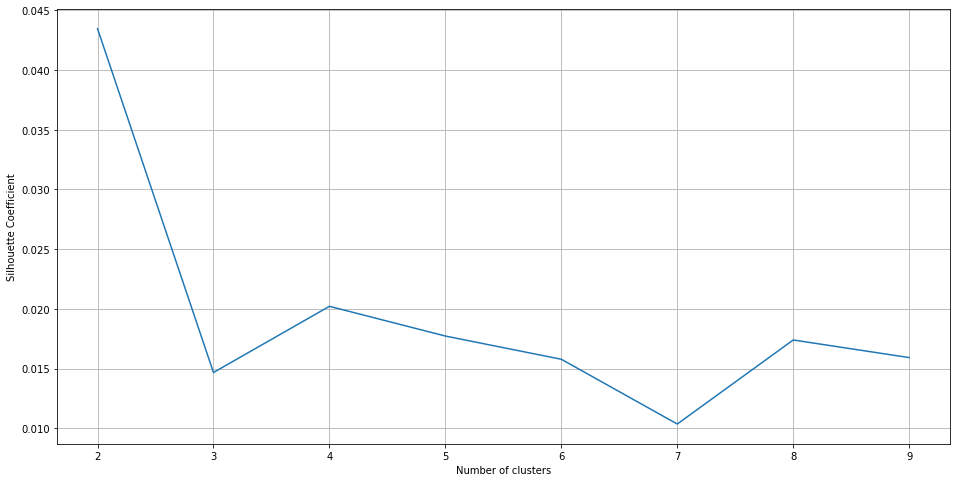

In [127]:
plt.figure(figsize=(16,8))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

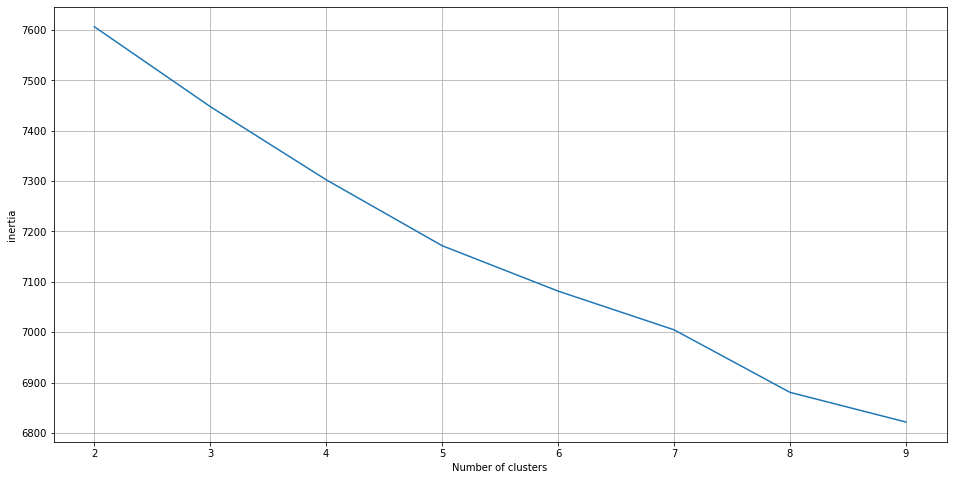

In [126]:
plt.figure(figsize=(16,8))
plt.plot(k_range, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.grid(True)

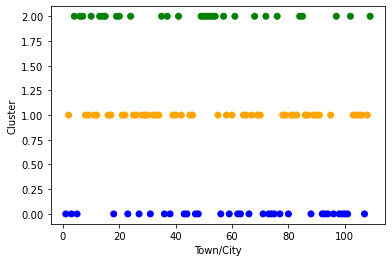

In [134]:
colors = np.array(['blue', 'orange', 'green'])


plt.scatter(df['simple_id'], df['cluster'], c=colors[list(df.cluster)])
plt.xlabel('Town/City')
plt.ylabel('Cluster')

plt.show()

# Where should you go?

In [72]:
recommend_place(df, 'Carlisle', 'Spa')

Top 5 recommended towns/cities based on your last visited place - Carlisle:
 -----------------------------------------------------
1 Harlow
2 Leeds
3 Watford
4 Leicester
5 Bath
